<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9218056522778535 test Score 0.8823414718689747
Estimators =  50 Train Score 0.9258003453081772 test Score 0.9017996618946738
Estimators =  100 Train Score 0.9264686001892619 test Score 0.9192036237227431
Estimators =  250 Train Score 0.9236186855308673 test Score 0.9165666645613592
Estimators =  450 Train Score 0.9246411731715931 test Score 0.91802933686891


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

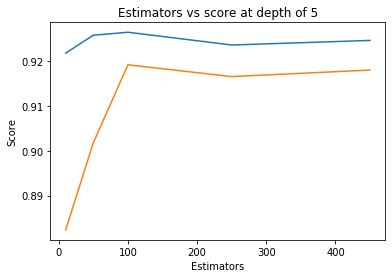

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8914243728351001 test Score 0.8616972825261878
depth =  9 Train Score 0.9596061907462927 test Score 0.9237098611755771
depth =  11 Train Score 0.9609335465457562 test Score 0.9238006835154635
depth =  15 Train Score 0.9658021249949501 test Score 0.9257374522266096
depth =  20 Train Score 0.9664092079357867 test Score 0.9258969864633709
depth =  35 Train Score 0.9664658452161101 test Score 0.9258790257903845
depth =  50 Train Score 0.9664658452161101 test Score 0.9258790257903845
depth =  70 Train Score 0.9664658452161101 test Score 0.9258790257903845
depth =  130 Train Score 0.9664658452161101 test Score 0.9258790257903845


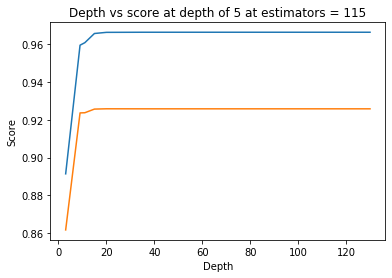

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [8]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
# print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96368617 0.96324135 0.96129318 0.96308844 0.96541799]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [10]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [11]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [12]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.967626805932229
Test f1 score 0.9264445381695486


In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


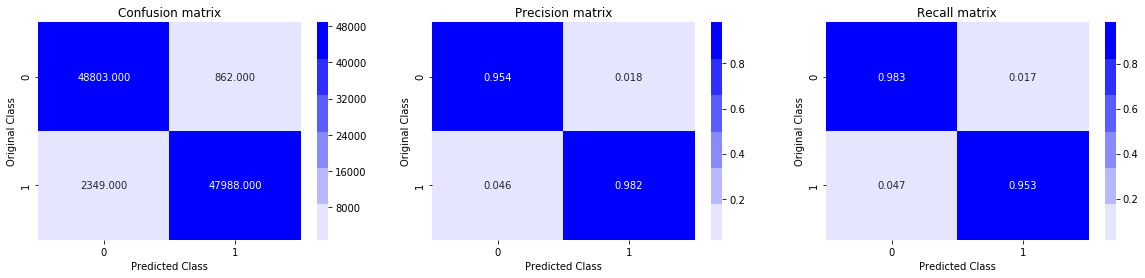

Test confusion_matrix


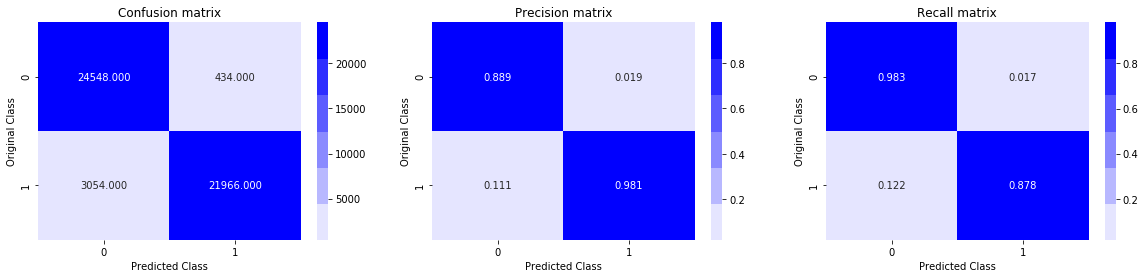

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

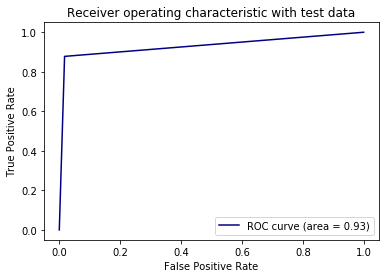

In [15]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

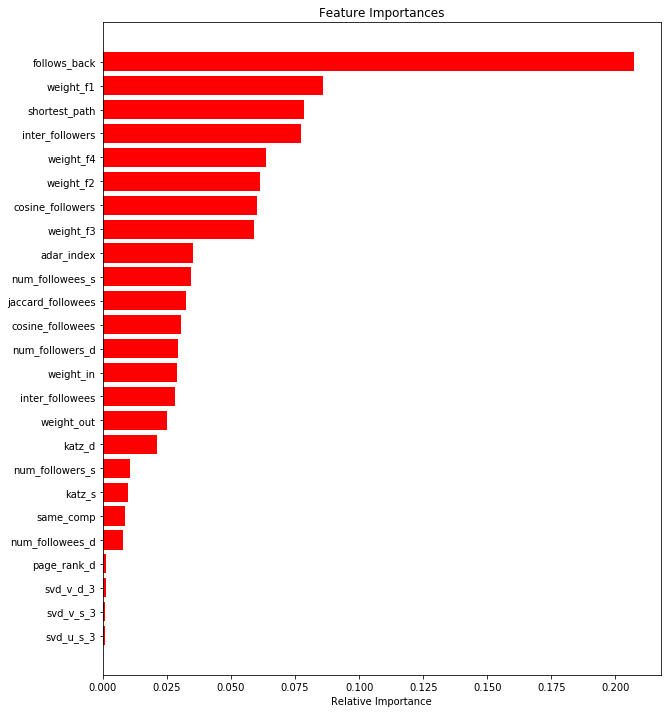

In [16]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

# Part 1 & part 2 is completed in featurization section so start working on part 3

In [28]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage6.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage6.h5', 'test_df',mode='r')

In [29]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_attachment_followees',
       'preferential_attachment_followers', 'svd_dot_product'

In [30]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followees,preferential_attachment_followers,svd_dot_product
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,...,1.719703e-14,-1.355368e-12,4.675302e-13,1.128589e-06,6.616669e-14,9.771059e-13,4.160011e-14,120,66,1.338835e-11
1,1092078,1019460,1,0,0.000000,0.142857,0.000000,4,7,7,...,1.347584e-14,-1.240513e-12,4.237680e-13,1.125696e-09,1.917101e-12,1.483785e-12,2.649401e-12,0,28,2.384645e-20
2,1430596,400599,1,0,0.098039,0.051948,0.233126,49,11,46,...,7.171148e-15,-4.091095e-13,4.076675e-14,2.783363e-12,4.809181e-13,9.748510e-14,1.847969e-16,460,539,1.252459e-21
3,1013979,1628559,1,0,0.333333,0.229081,0.524142,14,7,13,...,1.597539e-18,-1.903970e-16,4.652690e-16,4.073271e-15,8.574630e-17,1.387813e-15,7.993854e-19,91,98,2.609823e-28
4,197515,805550,1,0,0.000000,0.161985,0.000000,7,7,12,...,6.503282e-19,-4.760155e-19,2.910335e-16,1.515485e-15,1.854415e-18,3.395863e-18,3.250485e-19,0,49,3.974762e-30


In [31]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followees,preferential_attachment_followers,svd_dot_product
0,848424,784690,1,0,0.000000,0.029161,0.000000,6,14,6,...,5.535489e-14,-9.994074e-10,5.791890e-10,3.512358e-07,2.486659e-09,2.771126e-09,1.727685e-12,54,84,2.083237e-17
1,182360,205736,1,0,0.187500,0.157485,0.358569,7,12,5,...,1.262255e-18,-1.152091e-16,1.421397e-11,8.108408e-15,5.273874e-16,1.418345e-13,1.925426e-18,70,84,3.215717e-22
2,120585,539098,1,0,0.000000,0.051805,0.000000,73,122,28,...,2.106447e-06,-1.208154e-12,2.721133e-14,1.976924e-12,-1.766527e-11,2.396330e-13,8.069914e-05,0,8906,1.699884e-10
3,1286685,1751018,1,0,0.021739,0.000000,0.050252,43,11,36,...,2.050646e-14,-2.334162e-12,5.258642e-10,1.389547e-10,7.992433e-10,1.078892e-09,2.588075e-13,396,473,6.821693e-19
4,1284877,979430,1,0,0.000000,0.000000,0.000000,1,6,0,...,0.000000e+00,-1.949308e-13,1.340613e-14,1.431608e-13,1.773713e-14,1.016923e-13,4.527517e-15,0,6,-1.575727e-30


In [32]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [33]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [34]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followees,preferential_attachment_followers,svd_dot_product
0,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,...,1.719703e-14,-1.355368e-12,4.675302e-13,1.128589e-06,6.616669e-14,9.771059e-13,4.160011e-14,120,66,1.338835e-11
1,0,0.000000,0.142857,0.000000,4,7,7,0,2,0,...,1.347584e-14,-1.240513e-12,4.237680e-13,1.125696e-09,1.917101e-12,1.483785e-12,2.649401e-12,0,28,2.384645e-20
2,0,0.098039,0.051948,0.233126,49,11,46,10,4,5,...,7.171148e-15,-4.091095e-13,4.076675e-14,2.783363e-12,4.809181e-13,9.748510e-14,1.847969e-16,460,539,1.252459e-21
3,0,0.333333,0.229081,0.524142,14,7,13,7,6,5,...,1.597539e-18,-1.903970e-16,4.652690e-16,4.073271e-15,8.574630e-17,1.387813e-15,7.993854e-19,91,98,2.609823e-28
4,0,0.000000,0.161985,0.000000,7,7,12,0,3,0,...,6.503282e-19,-4.760155e-19,2.910335e-16,1.515485e-15,1.854415e-18,3.395863e-18,3.250485e-19,0,49,3.974762e-30


In [35]:
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followees,preferential_attachment_followers,svd_dot_product
0,0,0.000000,0.029161,0.000000,6,14,6,9,1,0,...,5.535489e-14,-9.994074e-10,5.791890e-10,3.512358e-07,2.486659e-09,2.771126e-09,1.727685e-12,54,84,2.083237e-17
1,0,0.187500,0.157485,0.358569,7,12,5,14,5,3,...,1.262255e-18,-1.152091e-16,1.421397e-11,8.108408e-15,5.273874e-16,1.418345e-13,1.925426e-18,70,84,3.215717e-22
2,0,0.000000,0.051805,0.000000,73,122,28,0,54,0,...,2.106447e-06,-1.208154e-12,2.721133e-14,1.976924e-12,-1.766527e-11,2.396330e-13,8.069914e-05,0,8906,1.699884e-10
3,0,0.021739,0.000000,0.050252,43,11,36,11,0,1,...,2.050646e-14,-2.334162e-12,5.258642e-10,1.389547e-10,7.992433e-10,1.078892e-09,2.588075e-13,396,473,6.821693e-19
4,0,0.000000,0.000000,0.000000,1,6,0,3,0,0,...,0.000000e+00,-1.949308e-13,1.340613e-14,1.431608e-13,1.773713e-14,1.016923e-13,4.527517e-15,0,6,-1.575727e-30


In [38]:
from xgboost import XGBClassifier

In [41]:
param_dist = {
              "n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
#               "min_samples_split": sp_randint(110,190),
#               "min_samples_leaf": sp_randint(25,65)
             }

clf = XGBClassifier(random_state=25,n_jobs=-1)

xgb_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25, verbose=3,n_jobs=-1)

xgb_random.fit(df_final_train,y_train)
print('mean test scores',xgb_random.cv_results_['mean_test_score'])
# print('mean train scores',rf_random.cv_results_['mean_train_score'])

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 51.8min finished


mean test scores [0.98157049 0.98153097 0.98164212 0.98184261 0.98200255]


In [43]:
print(xgb_random.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=112, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [44]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=112, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [46]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9955955916057158
Test f1 score 0.9247220391589956


Train confusion_matrix


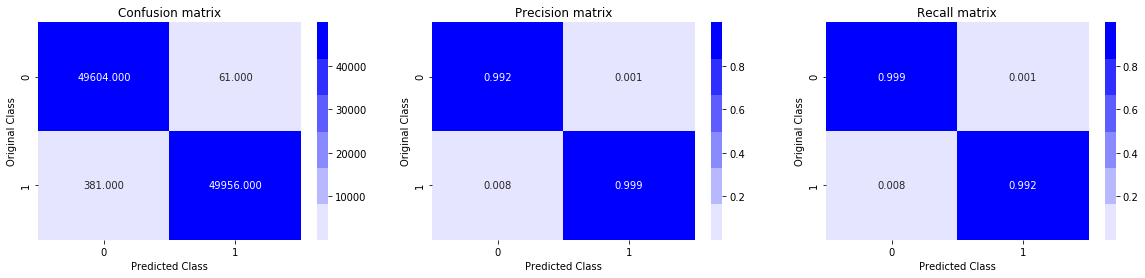

Test confusion_matrix


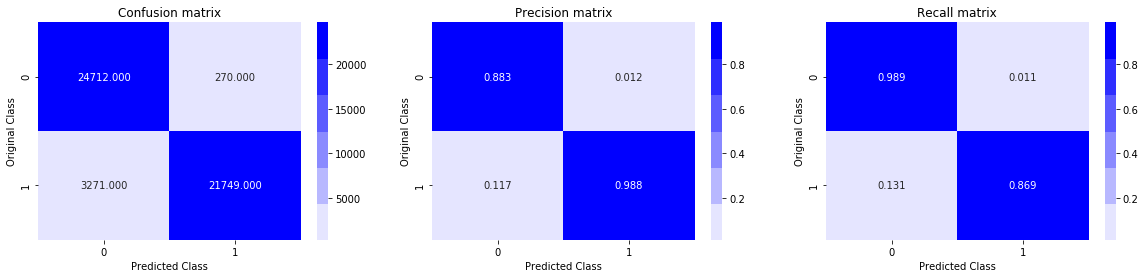

In [47]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

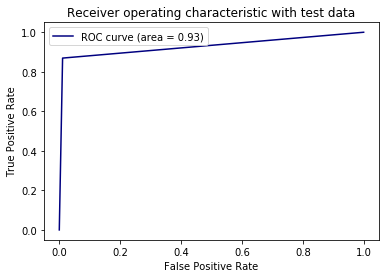

In [48]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

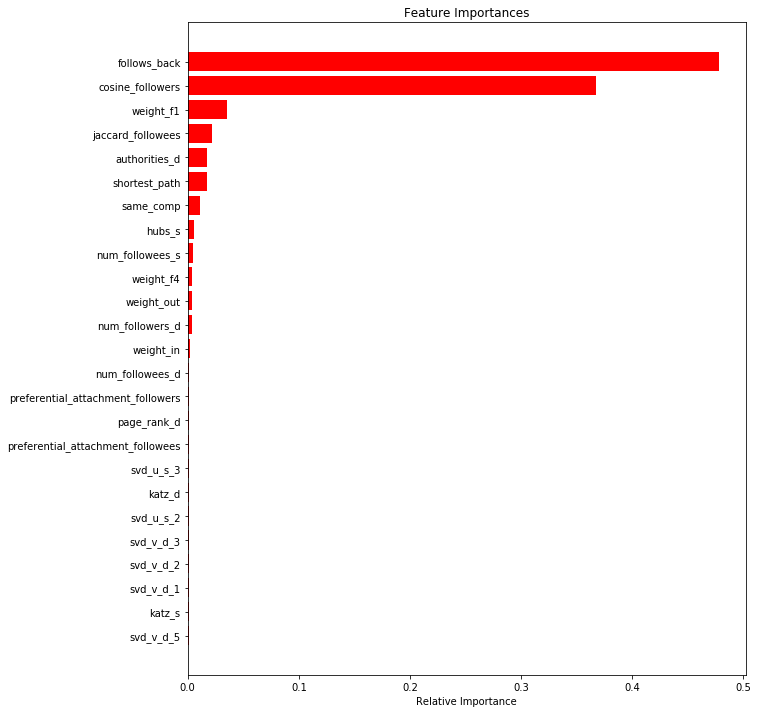

In [49]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Model Comparision

In [50]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Model', 'HyperParameter', 'Train F1 Score', 'Test F1 Score']
table.add_row(['RandomForestClassifier', 'n_estimators=121,max_depth=14,min_samples_split=111,min_samples_leaf=28', 0.967626805932229, 0.9264445381695486])
table.add_row(['XgboostClassifier', 'n_estimators=112,max_depth=11', 0.9955955916057158, 0.9247220391589956])

print(table)


+------------------------+-------------------------------------------------------------------------+--------------------+--------------------+
|         Model          |                              HyperParameter                             |   Train F1 Score   |   Test F1 Score    |
+------------------------+-------------------------------------------------------------------------+--------------------+--------------------+
| RandomForestClassifier | n_estimators=121,max_depth=14,min_samples_split=111,min_samples_leaf=28 | 0.967626805932229  | 0.9264445381695486 |
|   XgboostClassifier    |                      n_estimators=112,max_depth=11                      | 0.9955955916057158 | 0.9247220391589956 |
+------------------------+-------------------------------------------------------------------------+--------------------+--------------------+


# Observations

- Did EDA on FB friend recommendation
- Calculated three new features (preferential_attachment_followees, preferential_attachment_followers and svd_dot_product)
- Implement Xgboost Model with newly added features
- Hyperparameter tune Xgboost Model